In [19]:
# Import Matplotlib, Pandas, and Seaborn
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

filepath = "C:\\Users\\CAS233\\Desktop\\OC\\oc_prep.xlsx"
sheet = "1c_ss22"

# Create a DataFrame from csv file
df = pd.read_excel(filepath, sheet, header=3)

df1 = df[['mfp','sov_k','department','gender','cat','PC9']]

# First analysis: Revenue density by mfp

In [20]:
mask1 = (df1['department']=='MB')
mask2 = (df1['mfp']!= 'MB-FASHION PIECES') & (df1['mfp'] !='MB-SHORTS-SHORTS NON DENIM')
dfmb = df1[mask1 & mask2]

In [21]:
mask3 = (df1['department']=='MT')
mask4 = (df1['mfp']!= 'MB-FASHION PIECES') & (df1['mfp'] !='MB-SHORTS-SHORTS NON DENIM')
dfmt = df1[mask3 & mask4]

In [22]:
mask5 = (df1['department']=='WB')
mask6 = (df1['mfp']!= 'WB-SHORTS & SKIRTS-SHORTS') & (df1['mfp'] !='WB-SHORTS & SKIRTS-SKIRTS')&(df1['mfp'] !='WB-SWEATPANTS')
dfwb = df1[mask5 & mask6]

In [23]:
mask7 = (df1['department']=='WT')
mask8 = (df1['mfp']!= 'MB-FASHION PIECES') & (df1['mfp'] !='MB-SHORTS-SHORTS NON DENIM')
dfwt = df1[mask7 & mask8]

In [24]:

dfall = df1[mask2 & mask4 & mask6 & mask8]

In [25]:
def mygraph(df):
    sns.set_theme(style="darkgrid")
    sns.displot(
    df, x="sov_k", hue="mfp", kind='kde', facet_kws=dict(margin_titles=True), aspect=3    )
    

[None, None, None, None]

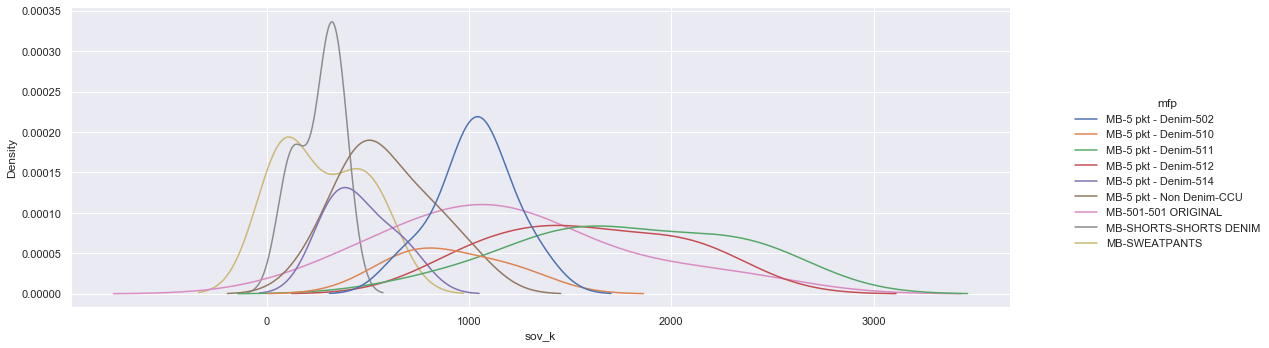

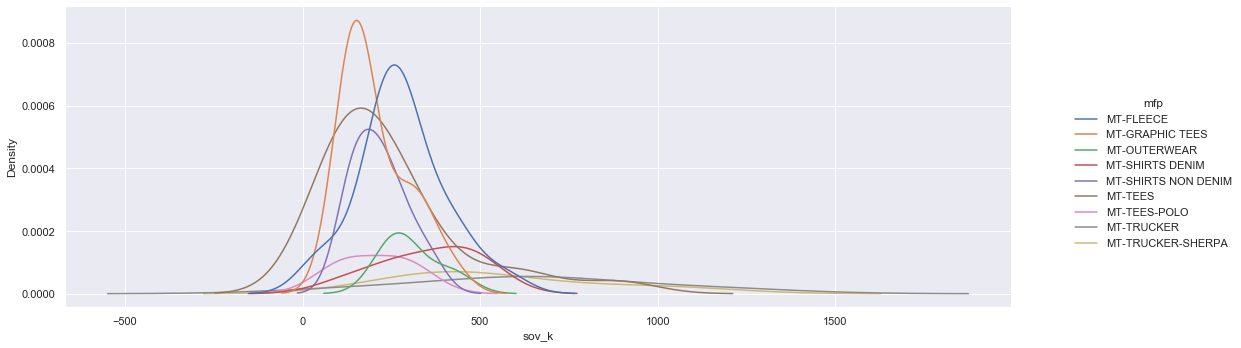

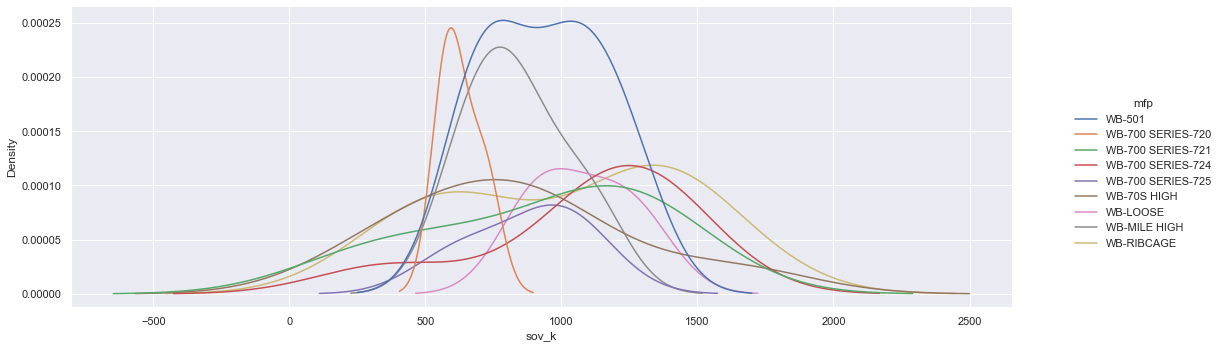

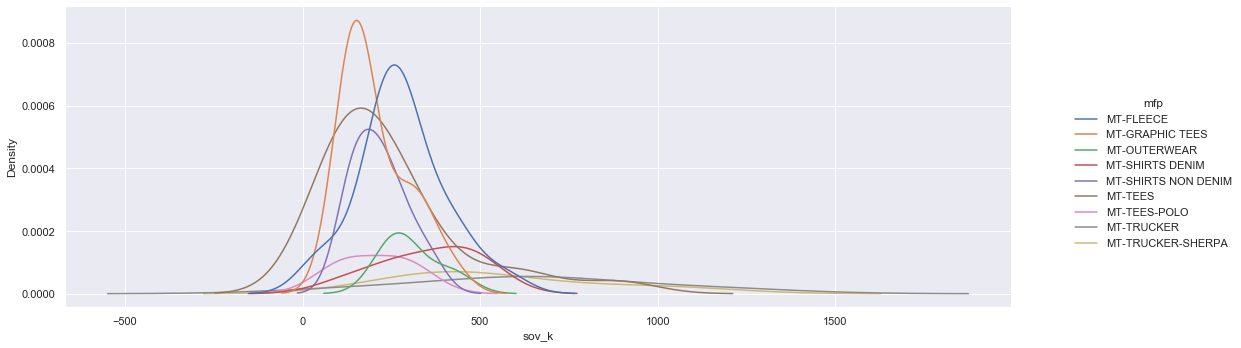

In [26]:
dfs = [dfmb,dfmt,dfwb,dfmt]
[mygraph(i) for i in dfs]

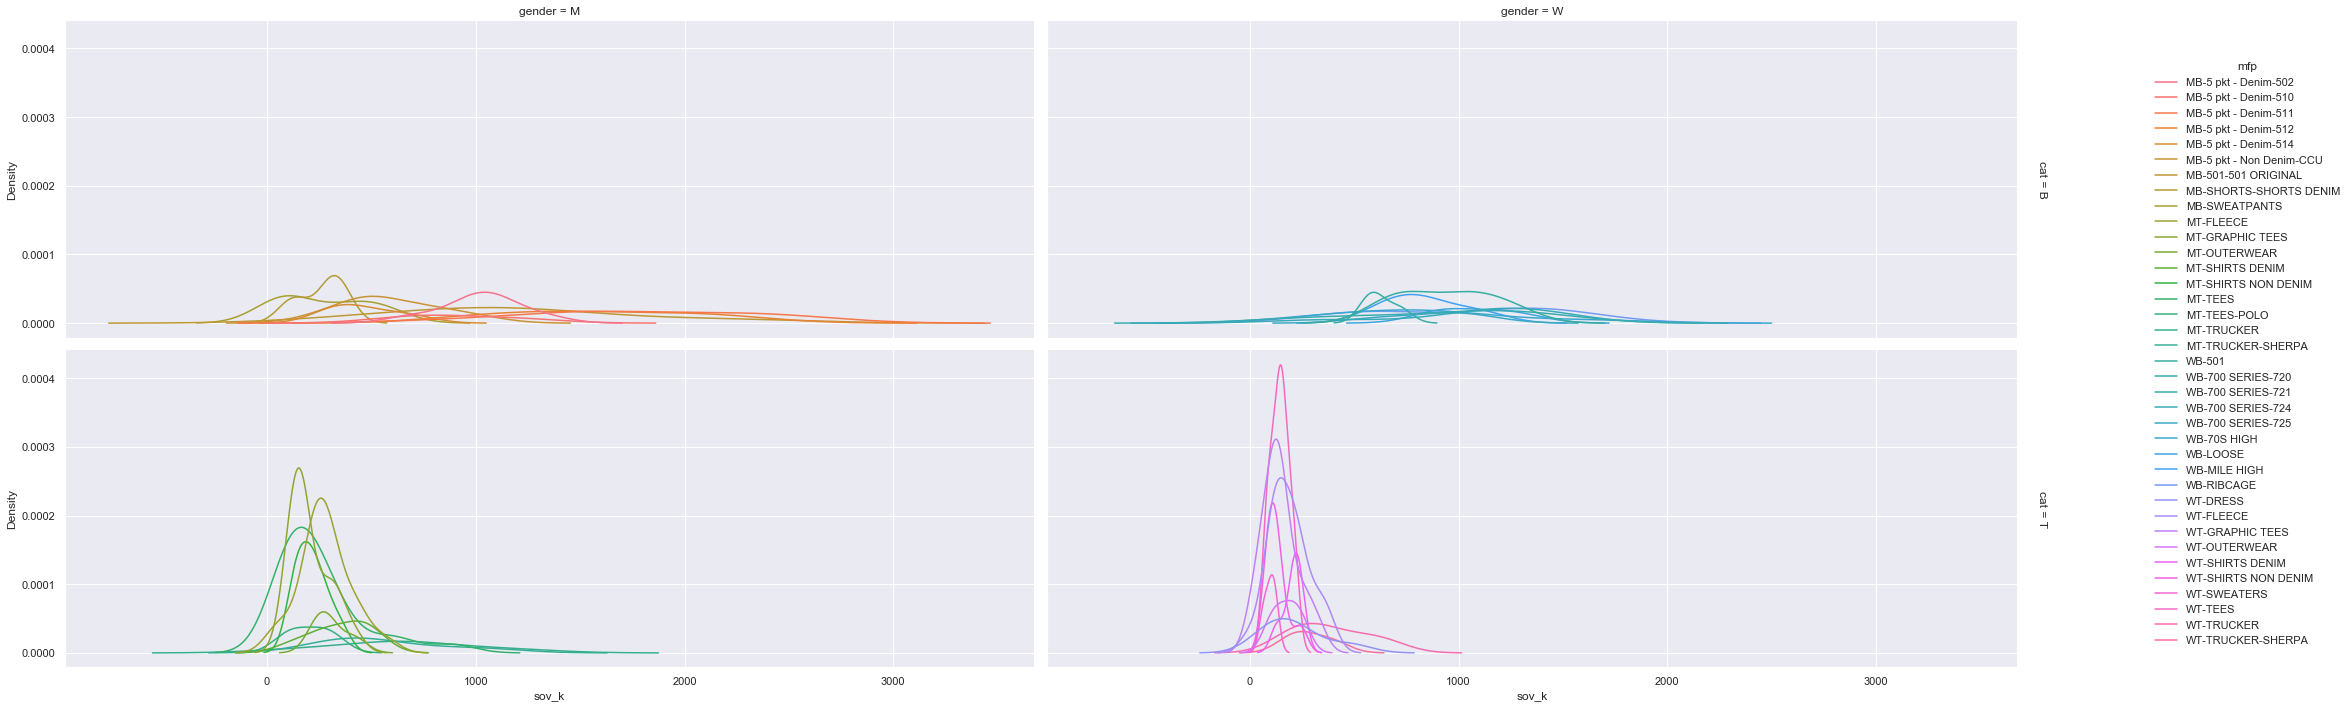

In [27]:
sns.displot(
    dfall, x="sov_k", hue="mfp", kind='kde', row='cat', col='gender', facet_kws=dict(margin_titles=True), aspect=3    )
    

# Second Analysis: Pareto by MFP

In [28]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
def pareto_plot(df, x=None, y=None, title=None, show_pct_y=False, pct_format='{0:.0%}'):
    xlabel = x
    ylabel = y
    tmp = df.sort_values(y, ascending=False)
    x = tmp[x].values
    y = tmp[y].values
    weights = y / y.sum()
    cumsum = weights.cumsum()
    
    fig, ax1 = plt.subplots()
    ax1.bar(x, y)
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)
    plt.xticks(rotation=90)

    ax2 = ax1.twinx()
    ax2.plot(x, cumsum, '-ro', alpha=0.5)
    ax2.set_ylabel('', color='r')
    ax2.tick_params('y', colors='r')
    
    vals = ax2.get_yticks()
    ax2.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

    # hide y-labels on right side
    if not show_pct_y:
        ax2.set_yticks([])
    
    formatted_weights = [pct_format.format(x) for x in cumsum]
    for i, txt in enumerate(formatted_weights):
        ax2.annotate(txt, (x[i], cumsum[i]), fontweight='heavy')    
    
    if title:
        plt.title(title)
    
    plt.tight_layout()
    plt.show()

In [49]:
#dfs = [dfmb,dfmt,dfwb,dfmt]
#[pareto_plot(i, x='mfp', y='sov_k', title='mfp') for i in dfs]


In [50]:
mfpmb = dfmb['mfp'].unique()
mfpmt = dfmt['mfp'].unique()
mfpwb = dfwb['mfp'].unique()
mfpwt = dfwt['mfp'].unique()
mfps = df1['mfp'].unique()
print(mfps)


['MB-5 pkt - Denim-502' 'MB-5 pkt - Denim-510' 'MB-5 pkt - Denim-511'
 'MB-5 pkt - Denim-512' 'MB-5 pkt - Denim-514' 'MB-5 pkt - Non Denim-CCU'
 'MB-501-501 ORIGINAL' 'MB-FASHION PIECES' 'MB-SHORTS-SHORTS DENIM'
 'MB-SHORTS-SHORTS NON DENIM' 'MB-SWEATPANTS' 'MT-FLEECE'
 'MT-GRAPHIC TEES' 'MT-OUTERWEAR' 'MT-SHIRTS DENIM' 'MT-SHIRTS NON DENIM'
 'MT-TEES' 'MT-TEES-POLO' 'MT-TRUCKER' 'MT-TRUCKER-SHERPA' 'WB-501'
 'WB-700 SERIES-720' 'WB-700 SERIES-721' 'WB-700 SERIES-724'
 'WB-700 SERIES-725' 'WB-70S HIGH' 'WB-LOOSE' 'WB-MILE HIGH' 'WB-RIBCAGE'
 'WB-SHORTS & SKIRTS-SHORTS' 'WB-SHORTS & SKIRTS-SKIRTS' 'WB-SWEATPANTS'
 'WT-DRESS' 'WT-FLEECE' 'WT-GRAPHIC TEES' 'WT-OUTERWEAR' 'WT-SHIRTS DENIM'
 'WT-SHIRTS NON DENIM' 'WT-SWEATERS' 'WT-TEES' 'WT-TRUCKER'
 'WT-TRUCKER-SHERPA']


In [51]:
#pareto_plot(df1, x='PC9', y='sov_k', title='mfp')

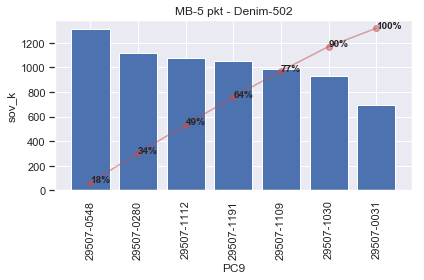

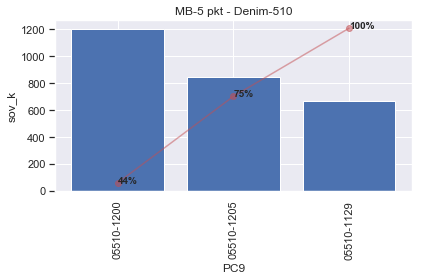

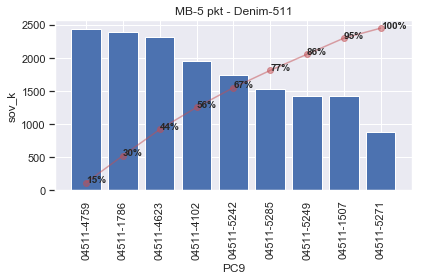

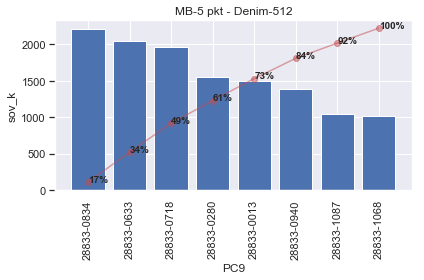

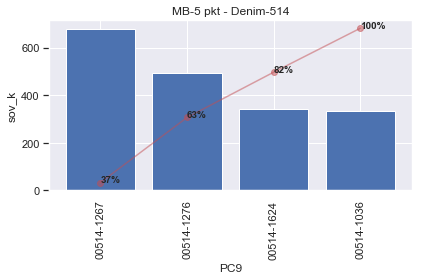

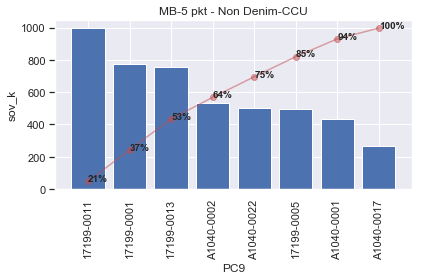

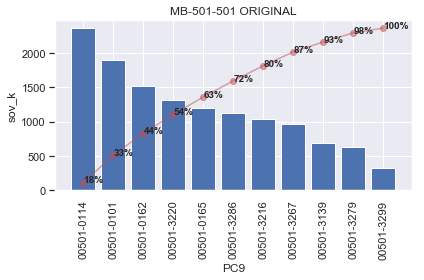

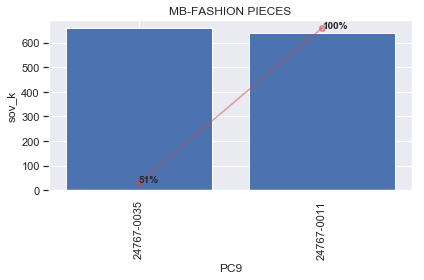

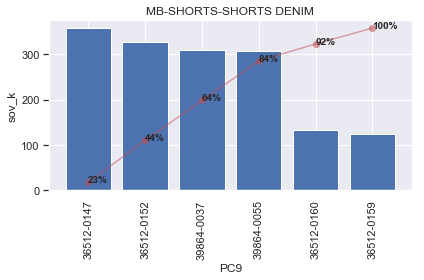

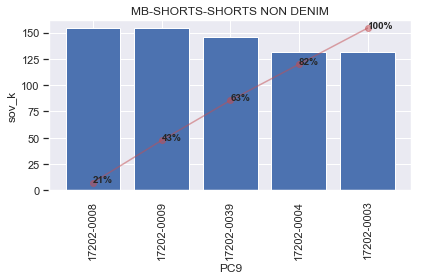

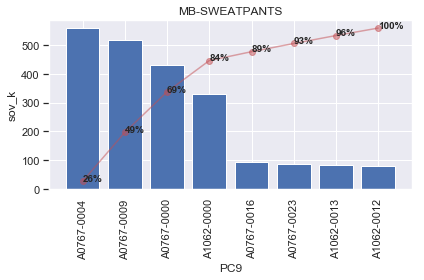

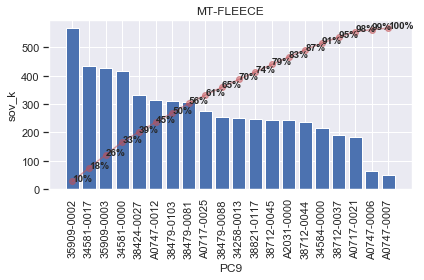

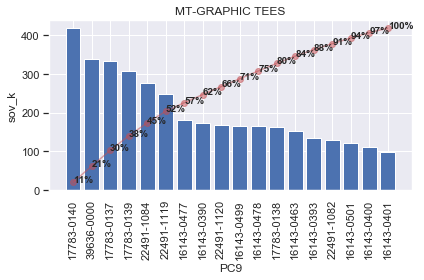

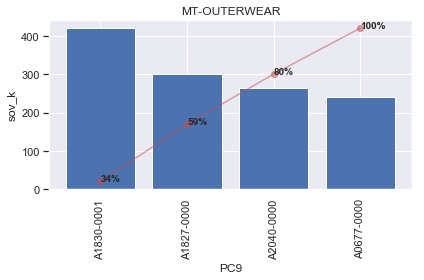

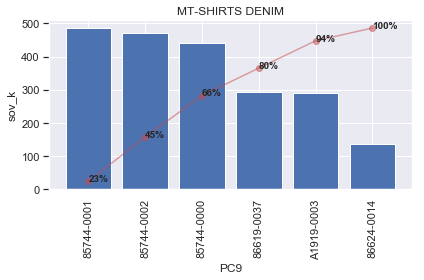

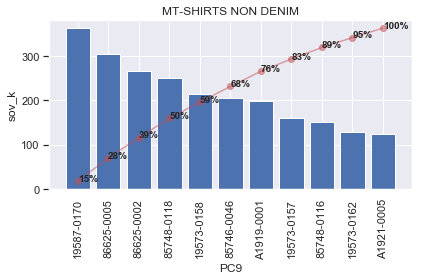

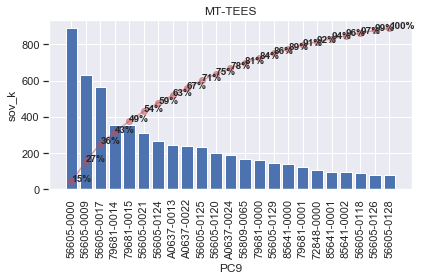

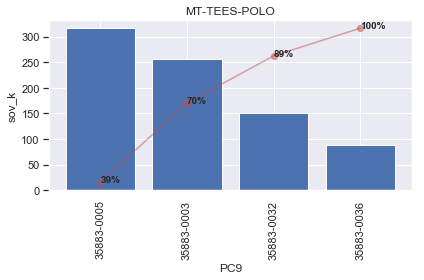

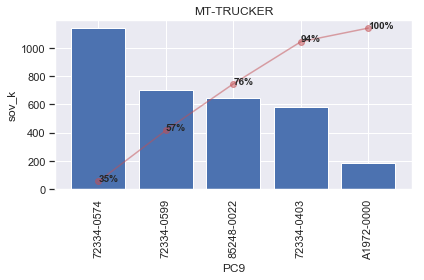

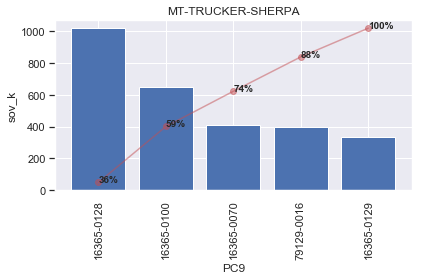

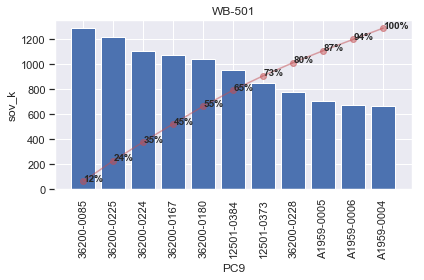

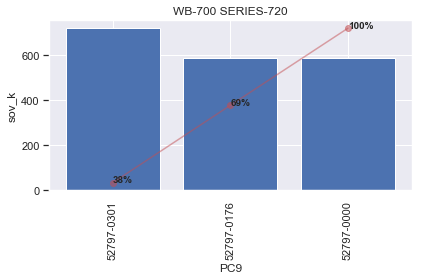

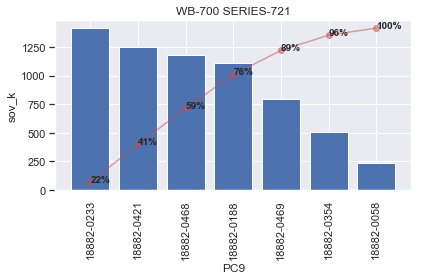

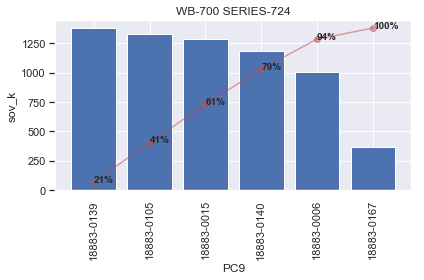

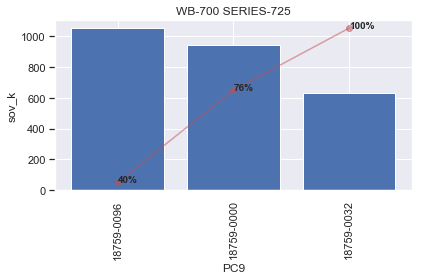

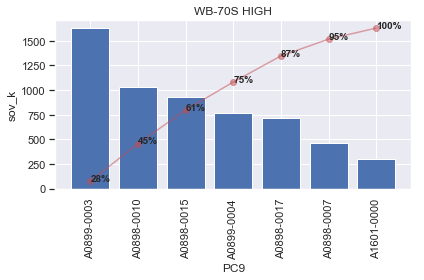

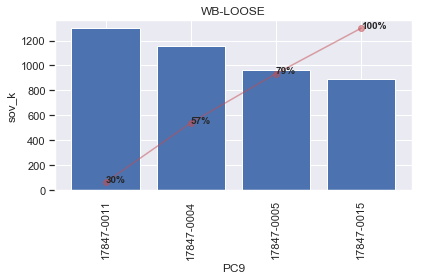

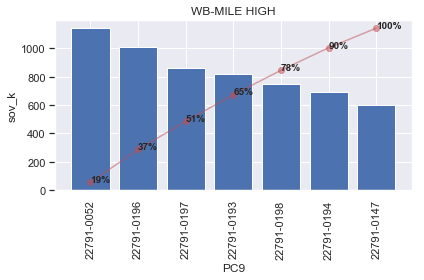

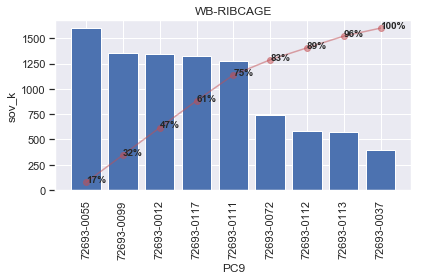

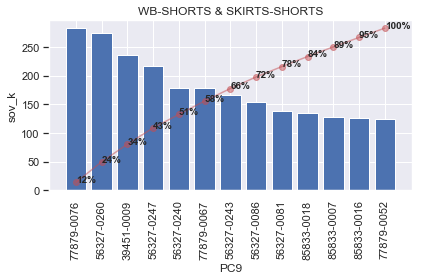

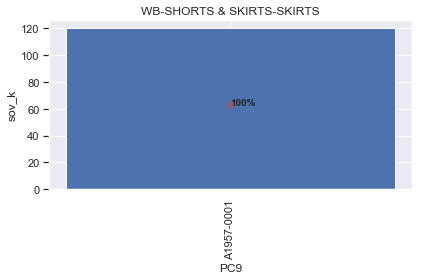

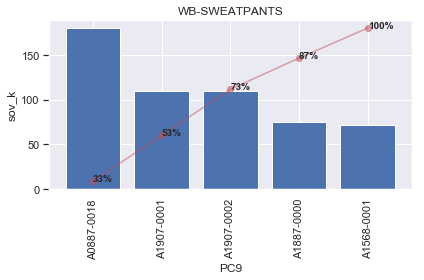

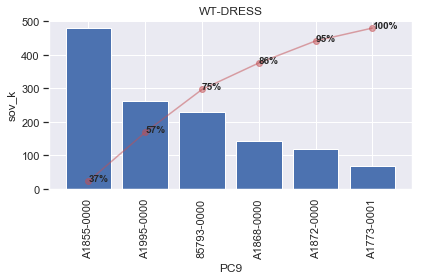

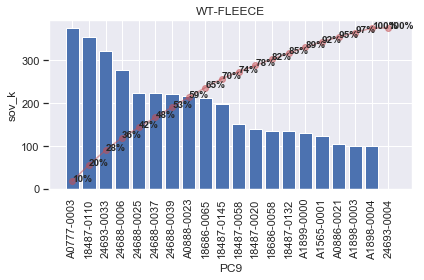

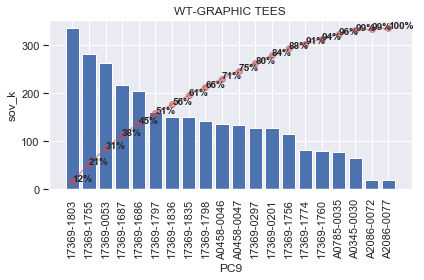

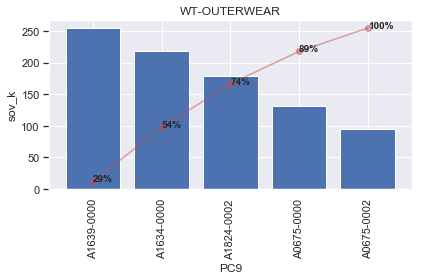

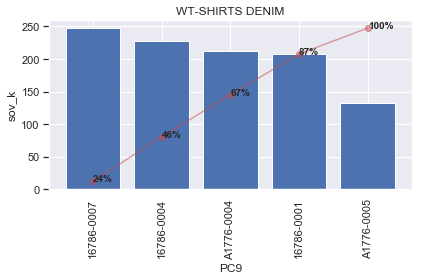

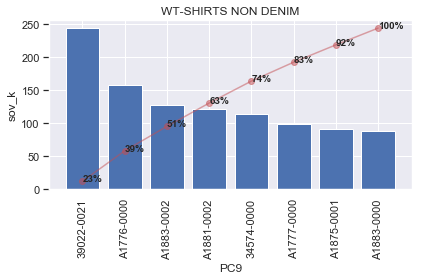

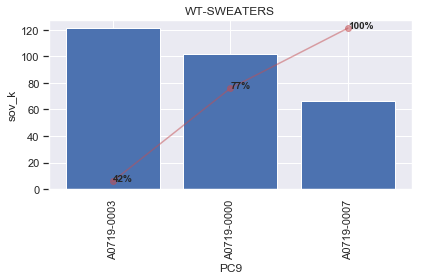

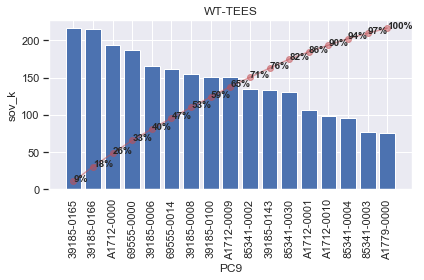

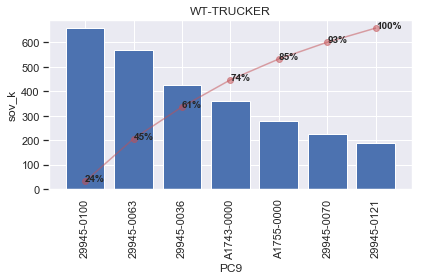

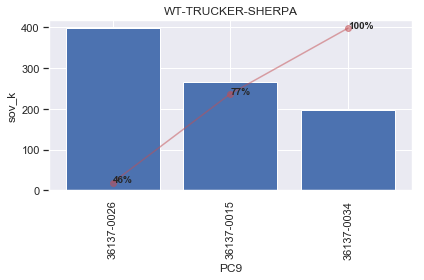

In [56]:
for i in mfps:
    tempdf = df1[(df1['mfp'] == i)]
    #print(tempdf)
    pareto_plot(tempdf, x='PC9',y='sov_k',title=i)
    #print("\n\n")